# Exercise Sheet for Interpolation and Approximation
----------------------------------------------------------

In [1]:
#load some python packages you will need
import numpy as np                 #this helps compute things
import matplotlib.pyplot as plt    #this helps plot things

### Enter your student ID number below, this will be used for a reproducable random number seed.

In [ ]:
sid = 12315550  #  *** change this to your student number ***
seed = np.random.seed(sid)

----------------------------------------------------------

## Question 1
### a) Compute via interpolation and plot the Lagrange polynomial p(x) to $f(x) = cos(-2\pi x) + 0.4x^2$ over
### $(x_i,y_i) = [(7.2,21.04),(7.4,21.12),(7.6,22.39),(7.8,24.77]$ 


Interpolation Points (xi): [7.2 7.4 7.6 7.8]
Interpolation Points (yi): [21.04 21.12 22.39 24.77]

Lagrange Polynomial p(x):
        3         2
-1.667 x + 51.88 x - 490.5 x + 1486


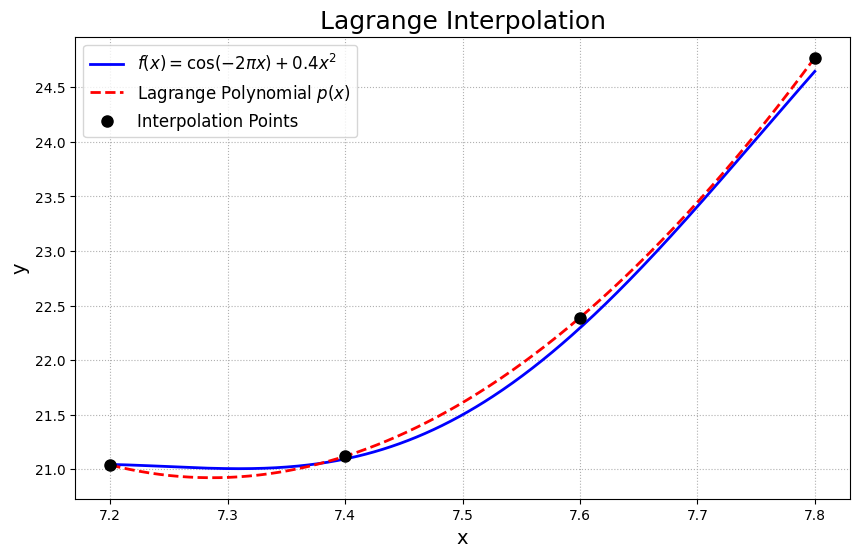

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import sympy as sp  


def f(x):
    return np.cos(-2 * np.pi * x) + 0.4 * x**2

xi = np.array([7.2, 7.4, 7.6, 7.8])
yi = np.array([21.04, 21.12, 22.39, 24.77])

print(f"Interpolation Points (xi): {xi}")
print(f"Interpolation Points (yi): {yi}")

p = lagrange(xi, yi)
print("\nLagrange Polynomial p(x):")
print(p)

x_plot = np.linspace(xi.min(), xi.max(), 500)
y_f = f(x_plot)
y_p = p(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_f, 'b-', linewidth=2, label=r'$f(x) = \cos(-2\pi x) + 0.4 x^2$')
plt.plot(x_plot, y_p, 'r--', linewidth=2, label='Lagrange Polynomial $p(x)$')
plt.plot(xi, yi, 'ko', markersize=8, label='Interpolation Points')

plt.title('Lagrange Interpolation', fontsize=18)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True, linestyle=':')
plt.legend(fontsize=12)
plt.show()



### b) Estimate the maximum absolute error bound for this Lagrange polynomial approximation over $\xi \in [x_0,x_n]$


We want to estimate the maximum absolute error for the Lagrange polynomial approximation of the function

$
f(x) = \cos(-2 \pi x) + 0.4 x^2
$

over the interval $[x_0, x_n] = [7.2, 7.8]$, using the interpolation points:

$
x_0 = 7.2, \quad x_1 = 7.4, \quad x_2 = 7.6, \quad x_3 = 7.8
$


The 4th derivative of $f(x)$ is:

$
f^{(4)}(x) = -16 \pi^4 \cos(2 \pi x)
$

 Maximum magnitude over the interval:  
$
\max |f^{(4)}(x)| = 16 \pi^4
$


For $n=3$, the product term is:

$
\prod_{i=0}^{3} |x - x_i| = |(x-7.2)(x-7.4)(x-7.6)(x-7.8)|
$

$
|(7.5-7.2)(7.5-7.4)(7.5-7.6)(7.5-7.8)| = 0.0009
$


Step 3: Compute the error bound

The maximum absolute error is estimated by:

$
|E_3(x)| \le \frac{\max |f^{(4)}(x)|}{4!} \cdot \max \left|\prod_{i=0}^{3} (x-x_i)\right|
$

$
|E_3(x)| \le \frac{16 \pi^4}{24} \cdot 0.0009 \approx 0.00186
$

Conclusion

The maximum absolute error bound for the Lagrange polynomial interpolation over $[7.2, 7.8]$ is approximately:

$
\boxed{|E_3(x)| \lesssim 0.0019}
$

This means that the polynomial approximation is extremely accurate on this interval.


----------------------------------------------------------

## Question 2
### Assume linear interpolation with step size $\textbf{d}$ is used to approximate $y(x) = \pi x^7$
### What step size for linear interpolation do you need to have for an absolute error $E_{max} < 10^{-6}$?

Linear Interpolation Error Formula


For a function $y(x)$, the error of linear interpolation between $x_0$ and $x_0 + h$ is bounded by:

$
|E(x)| \le \frac{1}{8} M_2 \, h^2
$

where $M_2 = \max_{\xi \in [x_0, x_0+h]} |y''(\xi)|$, and $h = d$ here.

This comes from the formula:

$
E(x) = \frac{y''(\xi_x)}{2} (x - x_0)(x - (x_0 + h))
$

and $\max |(x - x_0)(x - (x_0 + h))| = \frac{h^2}{4}$, so:

$
|E(x)| \le \frac{1}{2} \cdot \frac{h^2}{4} \cdot M_2 = \frac{1}{8} M_2 h^2.
$

Given $y(x) = \pi x^7$:

So $y''((x) = 42\pi x^5$

Assuming $[0,1]$ , the maximum of $|y''(x)|$ occurs at $x=1$:

$ 42\pi = M_2 $

$
\frac{1}{8} M_2 d^2 < 10^{-6}
$

$
\frac{1}{8} (42\pi) d^2 < 10^{-6}
$


$
\frac{42\pi}{8} d^2 < 10^{-6}
$

$
\frac{21\pi}{4} d^2 < 10^{-6}
$


$
d^2 < \frac{4 \times 10^{-6}}{21\pi}
$

$
21\pi  \approx 65.973
$


$
d^2 < \frac{4 \times 10^{-6}}{65.973} \approx 6.062512 \times 10^{-8}
$

Take the square root:

$
d < \sqrt{6.062512 \times 10^{-8}} \approx 2.462216 \times 10^{-4}
$

$
d \approx 2.46 \times 10^{-4}
$


----------------------------------------------------------

## Question 3
### When using Taylor polynomials to approximate $y = cos(-3 \pi x) + 3x$ over the range $x = [-0.25,0.25]$, about $x= 0$;  to what order $j$ would you need to compute the interpolating polynomial in order to keep the maximum absolute error smaller than $E_{j}(x) < 10^{-6}$?

Text(0, 0.5, 'y')

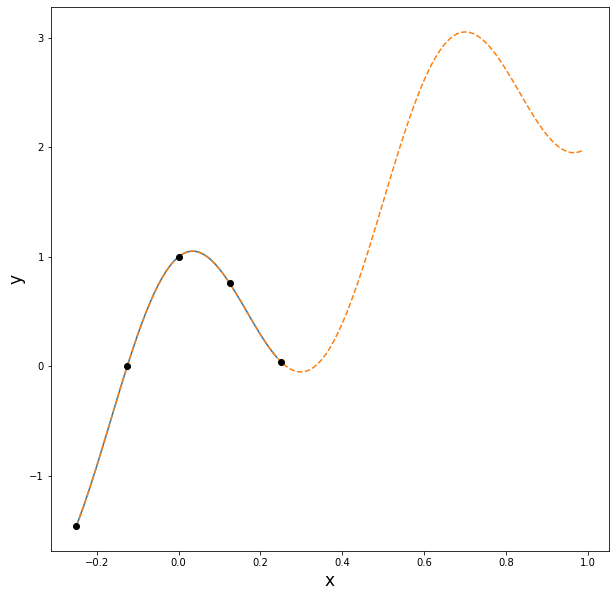

In [10]:
xi = np.arange(-0.25,1,0.01)
xdum = np.arange(-0.25,0.25,0.01)
x = np.array([-0.25,-0.125,0,0.125,0.25])
y = np.cos(-3*np.pi*x) + 3*x
ydum = np.cos(-3*np.pi*xdum) + 3*xdum
yi = np.cos(-3*np.pi*xi) + 3*xi
plt.figure(figsize=(10,10))
plt.plot(xdum,ydum)
plt.plot(xi,yi,'--')
plt.plot(x,y,'o',c='black')
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

----------------------------------------------------------

## Question 4
## Use bilinear interpolation to determine the value of the function $f(x,y) = z$  at the point $(x_r, y_r)$, given the below four data points $x_i, y_i$ with values $z_{i} = f(x_i,y_i)$


Text(0.2952258316506029, 0.7466788465348048, '($x_r,y_r)$')

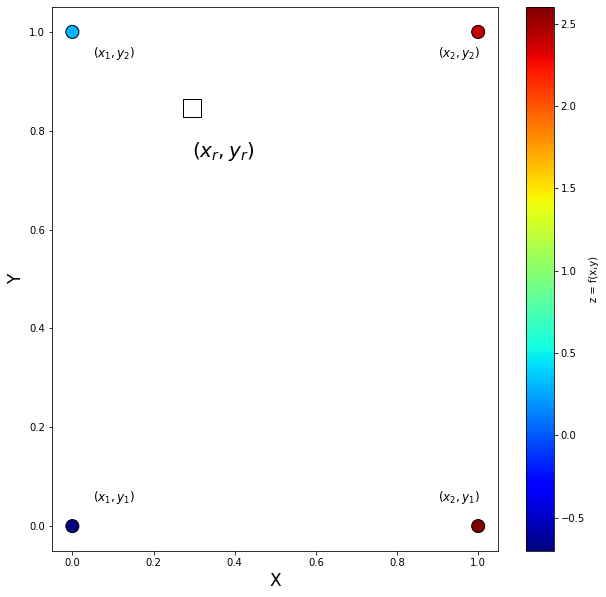

In [12]:
#Known data points and function values.  Listed clockwise from the x_1,y_1 = (0,0) point.
xi = np.array([0,0,1,1])  #x_1,x_1,x_2,x_2
yi = np.array([0,1,1,0])  #y_1,y_2,y_2,y_1
zi = np.array([-0.7,0.3,2.4,2.6])  

#Randomly generate coordinates to find function value (z = f(x,y)) at 
xr = np.random.uniform()
yr = np.random.uniform()

#Visualize
plt.figure(figsize=(10,10))
plt.scatter(xi,yi,c=zi,s=170,marker='o',cmap='jet',edgecolor='black')
plt.colorbar(label='z = f(x,y)')
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.scatter(xr,yr,edgecolor='black',marker='s',s=290,c='white')
plt.text(0.05,0.05,'($x_1,y_1)$',fontsize=12)
plt.text(0.05,0.95,'($x_1,y_2)$',fontsize=12)
plt.text(0.9,0.95,'($x_2,y_2)$',fontsize=12)
plt.text(0.9,0.05,'($x_2,y_1)$',fontsize=12)
plt.text(xr,yr-0.1,'($x_r,y_r)$',fontsize=20)



